In [244]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense ,Flatten ,LSTM ,Dropout ,Input ,Dropout
import os
import datetime

In [216]:
microsoft_data = pd.read_csv('E:/Data/script/Datasets/rnn_dataset/MicrosoftStock.csv')

In [217]:
microsoft_data.shape

(1259, 8)

In [218]:
microsoft_data.head()

,index,date,open,high,low,close,volume,Name
0,390198,2013-02-08,27.35,27.71,27.31,27.55,33318306,MSFT
1,390199,2013-02-11,27.65,27.92,27.50,27.86,32247549,MSFT
2,390200,2013-02-12,27.88,28.00,27.75,27.88,35990829,MSFT
3,390201,2013-02-13,27.93,28.11,27.88,28.03,41715530,MSFT
4,390202,2013-02-14,27.92,28.06,27.87,28.04,32663174,MSFT


In [219]:
# Suprimmer la colonne Name
microsoft_data.drop(['index','Name'],axis=1,inplace=True)

In [220]:
microsoft_data['date'] = pd.to_datetime(microsoft_data['date'])

In [221]:
microsoft_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1259 non-null   datetime64[ns]
 1   open    1259 non-null   float64       
 2   high    1259 non-null   float64       
 3   low     1259 non-null   float64       
 4   close   1259 non-null   float64       
 5   volume  1259 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB


In [222]:
# microsoft_data = microsoft_data.set_index('date')


In [223]:
microsoft_data.head()

,date,open,high,low,close,volume
0,2013-02-08,27.35,27.71,27.31,27.55,33318306
1,2013-02-11,27.65,27.92,27.50,27.86,32247549
2,2013-02-12,27.88,28.00,27.75,27.88,35990829
3,2013-02-13,27.93,28.11,27.88,28.03,41715530
4,2013-02-14,27.92,28.06,27.87,28.04,32663174


In [224]:
microsoft_data.describe()

,date,open,high,low,close,volume
count,1259,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,2015-08-09 05:44:16.393963264,51.026394,51.436007,50.630397,51.063081,3.386946e+07
min,2013-02-08 00:00:00,27.350000,27.600000,27.230000,27.370000,7.425603e+06
25%,2014-05-10 12:00:00,40.305000,40.637500,39.870000,40.310000,2.254879e+07
50%,2015-08-10 00:00:00,47.440000,47.810000,47.005000,47.520000,2.938758e+07
75%,2016-11-05 12:00:00,59.955000,60.435000,59.275000,59.730000,3.842024e+07
max,2018-02-07 00:00:00,95.140000,96.070000,93.720000,95.010000,2.483542e+08
std,NaN,14.859387,14.930144,14.774630,14.852117,1.958979e+07


## Visualisation de donnée

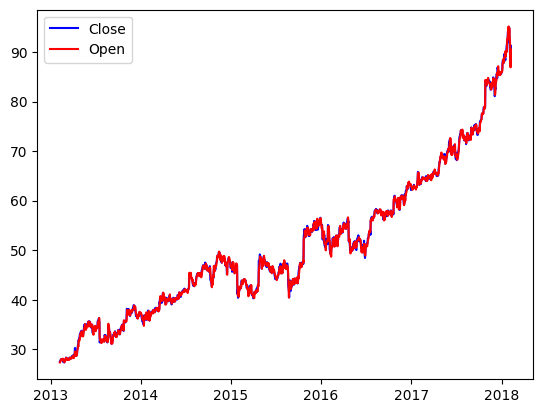

In [225]:
plt.plot(microsoft_data['date'],microsoft_data['close'],color='blue' ,label='Close')
plt.plot(microsoft_data['date'],microsoft_data['open'],color='red' ,label ="Open" )
plt.legend()
plt.show()

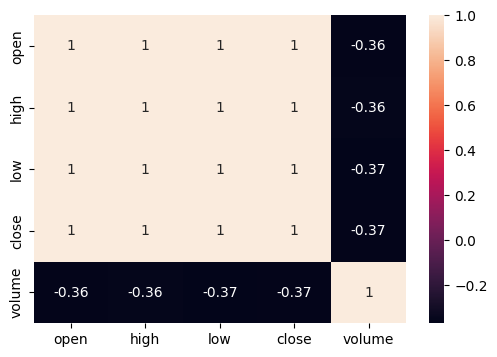

In [226]:
numeric_col = ['open', 'high', 'low', 'close', 'volume']
numeric_data = microsoft_data[numeric_col]

plt.figure(figsize=(6,4))
sns.heatmap(numeric_data.corr(),annot=True)
plt.show()

In [227]:
def gen_data(data ,windows):
    X_train,Y_train = [] ,[]
    for i in range(windows ,len(data)):
        X_train.append(data.loc[i-windows:i-1,0].values)
        Y_train.append(data.loc[i,0])
    return X_train ,Y_train

## Normalisation

In [228]:
close = pd.DataFrame(microsoft_data['close'])

In [229]:
scale = StandardScaler()

close = pd.DataFrame(scale.fit_transform(close))

In [230]:
close

,0
0,-1.583776
1,-1.562895
2,-1.561548
3,-1.551444
4,-1.550771
...,...
1254,2.909625
1255,2.742579
1256,2.487968
1257,2.712268


In [231]:
data,target = gen_data(close,60)
data ,target= np.array(data) ,np.array(target)

In [237]:
data = data.reshape(-1,60,1)

In [238]:
data.shape

(1199, 60, 1)

In [239]:
training_len = int(np.ceil(len(data)*0.95))

In [242]:
train_data = data[:training_len,:,:]
test_data = data[training_len: ,:,:]

train_target = target[:training_len]
test_target = target[training_len:]

In [243]:
train_data.shape

(1140, 60, 1)

## Modelisation de model

In [ ]:
model = Sequential()

In [245]:
model.add(Input(shape=(60,1)))
model.add(LSTM(64 ,return_sequences=True))

model.add(LSTM(64,return_sequences= False)) 

model.add(Dense(128,activation='relu')) 

model.add(Dropout(0.5))

model.add(Dense(1 ,activation='linear'))

print(model.summary())


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [246]:
model.compile(
    loss ='mae',
    optimizer='adam'
)

In [ ]:
history = model.fit(train_data,train_target ,batch_size=32,epochs=50)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 83ms/step - loss: 0.2528
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1294
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.1225
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.1118
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - loss: 0.1106
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.1068
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.1110
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - loss: 0.1114
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.1053
Epoch 10/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.1067
Epoch 11/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 80ms/step - loss: 0.1020
Epoch 12/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0995
Epoch 13/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.1065
Epoch 14/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - loss: 0.1056
Epoch 15/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - loss: 0.0988
Epo

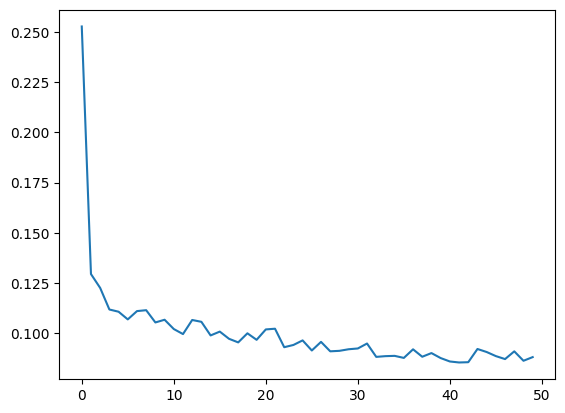

In [248]:
loss = history.history['loss']

plt.plot(loss)
plt.show()

In [249]:
prediction = model.predict(test_data)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step  


In [ ]:
train = 

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB
None
               index         open         high          low 

e:\Data\script\venv\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 17s 109ms/step - loss: 0.2574 - root_mean_squared_error: 0.3836
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.1300 - root_mean_squared_error: 0.1812
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.1249 - root_mean_squared_error: 0.1711
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 0.1176 - root_mean_squared_error: 0.1624
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - loss: 0.1156 - root_mean_squared_error: 0.1559
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - loss: 0.1142 - root_mean_squared_error: 0.1568
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.1077 - root_mean_squared_error: 0.1451
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 82ms/step - loss: 0.1065 - root_mean_squared_error: 0.1463
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 92ms/step - loss: 0.1055 - root_mean_squared_error: 0.1419
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 112ms/step - loss: 0.0988 - root_mean_squared_error: 0.

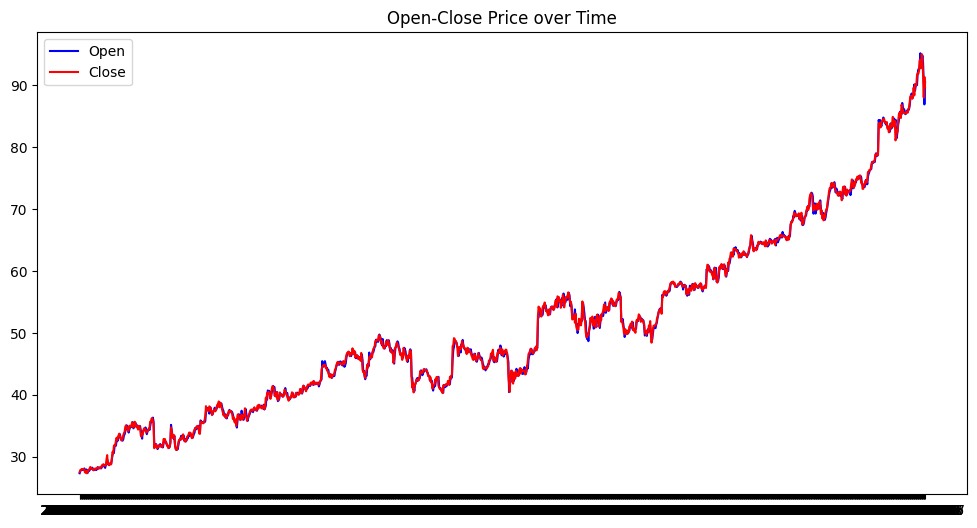

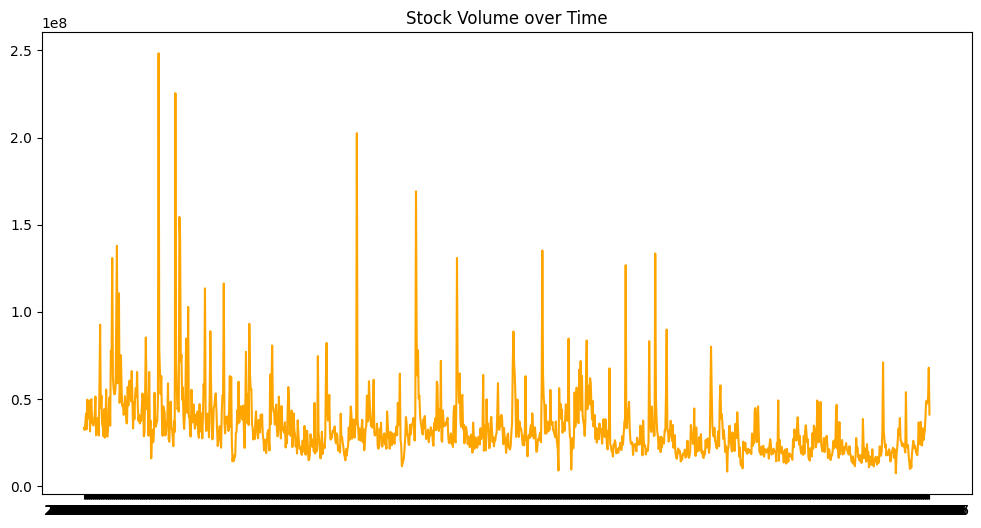

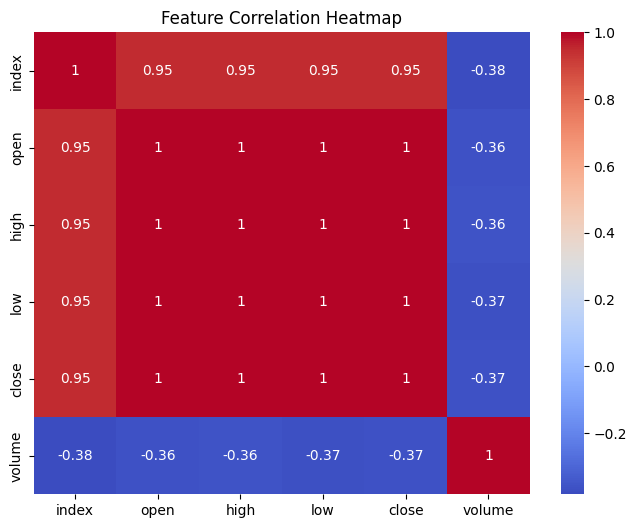

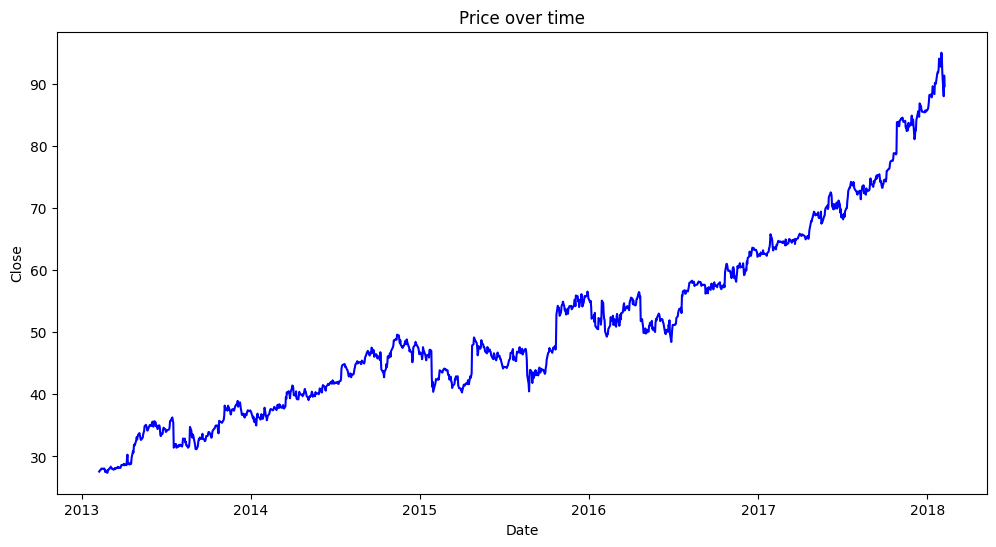

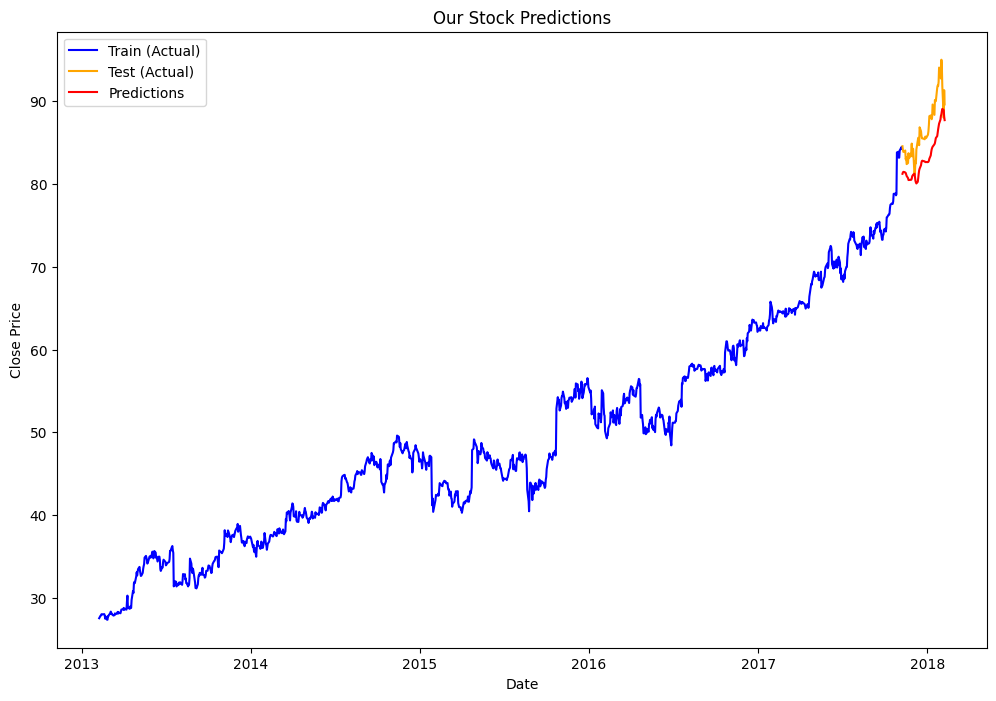

In [ ]:
# Imports
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



data = pd.read_csv('E:/Data/script/Datasets/rnn_dataset/MicrosoftStock.csv')
print(data.head())
print(data.info())
print(data.describe())


# Initial Data Visualization
# Plot 1 - Open and Close Prices of time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['open'], label="Open",color="blue")
plt.plot(data['date'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
# plt.show()

# Plot 2 - Trading Volume (check for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
# plt.show()


# Drop non-numeric columns
numeric_data = data.select_dtypes(include=["int64","float64"])

# Plot 3 - Check for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
# plt.show()


# Convert the Data into Date time then create a date filter
data['date'] = pd.to_datetime(data['date'])

prediction = data.loc[
    (data['date'] > datetime(2013,1,1)) &
    (data['date'] < datetime(2018,1,1))
]

plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")


# Prepare for the LSTM Model (Sequential)
stock_close = data.filter(["close"])
dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []


# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


# Build the Model
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])


training = model.fit(X_train, y_train, epochs=20, batch_size=32)

# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


# Plotting data
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

